In [1]:
import os

from unet import unet_model
import numpy as np
import cv2 
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
import random

### Constants

In [2]:
WIDTH = 128
HEIGHT = 128
NUM_CLASSES = 8
beach_litter_path = 'Beach Cleanup Dataset/beachlitter_dataset_2022/beachlitter'
images_path = beach_litter_path + '/images' # These are jpgs
masks_path = beach_litter_path + '/maskpngs' # These are pngs

### Convert image and mask data into numpy arrays

In [5]:
def data_to_numpy_arr():
    # Iterate over every file in the directory, resize, append to array
    images_arr = []
    mask_arr = []
    
    image_files = glob.glob(images_path + '/*')
    mask_files = glob.glob(masks_path + '/*')
    
    # One liner fun 🤓    
    [images_arr.append(cv2.resize(cv2.imread(image_file, cv2.IMREAD_COLOR), (HEIGHT, WIDTH))) for image_file in image_files]
    [mask_arr.append(cv2.resize(cv2.imread(mask_file, cv2.IMREAD_COLOR), (HEIGHT, WIDTH))) for mask_file in mask_files]

    return np.array(images_arr), np.array(mask_arr)

In [6]:
images_arr, mask_arr = data_to_numpy_arr()

In [7]:
print(f'Images array shape {images_arr.shape}')
print(f'Mask array shape {mask_arr.shape}')
print()
print(f'Images array type {images_arr.dtype}')
print(f'Mask array type {mask_arr.dtype}')

Images array shape (3500, 128, 128, 3)
Mask array shape (3500, 128, 128, 3)

Images array type uint8
Mask array type uint8


In [8]:
np.unique(mask_arr)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128],
      dtype=uint8)

### Visualization after processing

In [23]:
def visualize_random_image_pair():
    random_index = np.random.randint(0, len(images_arr))
    random_image = images_arr[random_index]
    random_mask = mask_arr[random_index]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 8])

    fig.suptitle('Random image and mask pair')
    ax1.imshow(random_image)
    ax2.imshow(random_mask)
    
    plt.show()
    
    # plt.imshow(random_image)
    # plt.axis('off')  # Hide axis ticks
    # plt.show()

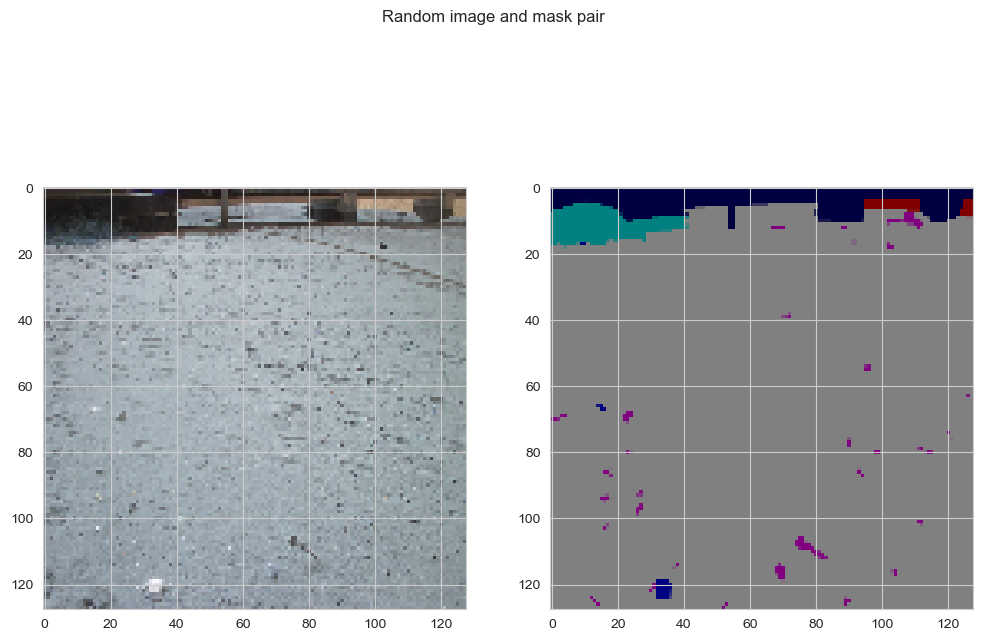

In [26]:
visualize_random_image_pair()